In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read data
column_names = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 
                'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 
                'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 
                'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
                'LinksPointingToPage', 'StatsReport', 'class']           
df = pd.read_csv("phishing.txt", names=column_names)
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Check for missing values
df.info()

# There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11055 non-null  int64
 1   LongURL              11055 non-null  int64
 2   ShortURL             11055 non-null  int64
 3   Symbol@              11055 non-null  int64
 4   Redirecting//        11055 non-null  int64
 5   PrefixSuffix-        11055 non-null  int64
 6   SubDomains           11055 non-null  int64
 7   HTTPS                11055 non-null  int64
 8   DomainRegLen         11055 non-null  int64
 9   Favicon              11055 non-null  int64
 10  NonStdPort           11055 non-null  int64
 11  HTTPSDomainURL       11055 non-null  int64
 12  RequestURL           11055 non-null  int64
 13  AnchorURL            11055 non-null  int64
 14  LinksInScriptTags    11055 non-null  int64
 15  ServerFormHandler    11055 non-null  int64
 16  InfoEmail            1

In [6]:
# Assign dependent and independent variables
X = df.iloc[:,0:30]
Y = df.iloc[:,30]

# Check columns for X variable
X.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

In [9]:
# Check columns for target
Y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: class, dtype: int64

Exercise 1

In [10]:
# Divide dataset into training and test set
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.3, train_size=0.7)

In [11]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=100)

# Fit the model
lgr.fit(x_train, y_train)

# Predict output
y_pred = lgr.predict(x_test)

In [13]:
# Import Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Print Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9297558034368405


In [16]:
# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 

Confusion Matrix:
[[1338  140]
 [  93 1746]]


In [17]:
# Print number of misclassified samples
cm = confusion_matrix(y_test, y_pred)
fp = cm[0][1]
fn = cm[1][0]

print("# Misclassified samples:", fp+fn)

# Misclassified samples: 233


Exercise 2

In [18]:
# Assign dataset features to the dependent variable
X2 = df.iloc[:,[5,13]]
X2.head()

,PrefixSuffix-,AnchorURL
0,-1,-1
1,-1,0
2,-1,0
3,-1,0
4,-1,0


In [19]:
# Separate training and testing data
(x_train, x_test, y_train, y_test) = train_test_split(X2, Y, test_size=0.3, train_size=0.7)

In [20]:
# Fit the model
lgr.fit(x_train, y_train)

# Predict the output
y_pred = lgr.predict(x_test)

In [21]:
# Check accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# It has less accuracy than the previous model

Accuracy: 0.8531805848658426


In [28]:
# Get the parameters of the decision boundary
w1,w2 = lgr.coef_.T
b = lgr.intercept_[0]

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

In [31]:
# Convert dataframe into array and construct the decision boundary
xf = x_test.to_numpy()
yf = m*xf + c

array([[-0.14404059, -0.14404059],
       [-2.91879163, -2.91879163],
       [-0.14404059, -0.14404059],
       ...,
       [-0.14404059, -1.53141611],
       [-0.14404059, -1.53141611],
       [-0.14404059, -0.14404059]])

In [32]:
# Import required libraries
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, '$x_1$')

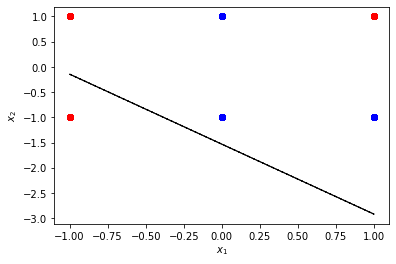

In [77]:
# Plot the test data along with the decision boundary
plt.plot(xf, yf, 'k', lw=1, ls='--')              # Decision boundary
plt.scatter(xf[:,1], y_test, c='blue', alpha=0.5)            # URL_of_Anchor
plt.scatter(xf[:,0], y_test, c='red', alpha=0.5)             # Prefix_Suffix
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

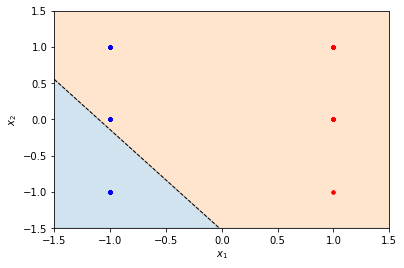

In [139]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.scatter(*xf[y_test==1].T, s=8, c='red')
plt.scatter(*xf[y_test==-1].T, s=8, c='blue')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()